# Q2.3: Heart Disease Autoencoder (Simple vs Deep)

Build and compare a **simple** and a **deep** autoencoder architecture (same bottleneck size).

**Exam outputs:** model comparison (loss curves) and reconstruction error comparison.

## Step 1: Import Libraries

In [22]:
# Install tensorflow if not already installed (this line should be executed first)
try:
    import tensorflow
except ImportError:
    print("TensorFlow not found. Installing now...")
    !pip install tensorflow
    print("TensorFlow installed. Please restart the runtime to ensure all imports work correctly.")

TensorFlow not found. Installing now...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 740.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 150.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 146.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.2 MB/s eta 0:00:00
TensorFlow installed. Please restart the runtime to ensure all imports work correctly.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


## Step 2: Load Heart Disease Dataset

### Load Data from URL

In [24]:
# Load from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=cols, na_values='?')
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:\n{df.head()}")

Dataset Shape: (303, 14)

First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


### Preprocess Data

In [25]:
# Drop missing values
df = df.dropna()

# Separate features and target
X = df.drop('target', axis=1).values
print(f"\nFeature Shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")


Feature Shape: (297, 13)
Number of features: 13


### Normalize Features

In [26]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print(f"Normalized Data Shape: {X_norm.shape}")

Normalized Data Shape: (297, 13)


## Step 3: Build Autoencoder with 3 Neurons

### Simple Architecture

In [27]:
# Simple autoencoder
inp_simple = Input(shape=(X_norm.shape[1],))
encoded_simple = Dense(3, activation='relu', name='encoded_simple')(inp_simple)
decoded_simple = Dense(X_norm.shape[1], activation='sigmoid', name='decoded_simple')(encoded_simple)

ae_simple = Model(inp_simple, decoded_simple)
encoder_simple = Model(inp_simple, encoded_simple)

ae_simple.compile(optimizer='adam', loss='mse')
print("Simple Autoencoder (3 neurons):")
ae_simple.summary()

Simple Autoencoder (3 neurons):


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_simple (Dense)          │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded_simple (Dense)          │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

### Deep Architecture (Multiple Hidden Layers)

In [28]:
# Deep autoencoder with more layers
inp_deep = Input(shape=(X_norm.shape[1],))
enc1 = Dense(8, activation='relu')(inp_deep)
enc2 = Dense(3, activation='relu', name='bottleneck')(enc1)
dec1 = Dense(8, activation='relu')(enc2)
decoded_deep = Dense(X_norm.shape[1], activation='sigmoid')(dec1)

ae_deep = Model(inp_deep, decoded_deep)
encoder_deep = Model(inp_deep, enc2)

ae_deep.compile(optimizer='adam', loss='mse')
print("\nDeep Autoencoder (with hidden layers):")
ae_deep.summary()


Deep Autoencoder (with hidden layers):


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           117 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288 (1.12 KB)

 Trainable params: 288 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train Both Autoencoders

### Train Simple Autoencoder

In [29]:
history_simple = ae_simple.fit(X_norm, X_norm,
                               epochs=100,
                               batch_size=16,
                               shuffle=True,
                               verbose=0)
print("Simple autoencoder training completed")

Simple autoencoder training completed


### Train Deep Autoencoder

In [30]:
history_deep = ae_deep.fit(X_norm, X_norm,
                           epochs=100,
                           batch_size=16,
                           shuffle=True,
                           verbose=0)
print("Deep autoencoder training completed")

Deep autoencoder training completed


## Step 5: Display Reduced Dimension Values

### Simple Autoencoder Encoding

In [31]:
encoded_simple_data = encoder_simple.predict(X_norm, verbose=0)
print(f"Simple Autoencoder - Encoded Shape: {encoded_simple_data.shape}")
print(f"\nFirst 10 encoded samples:\n{encoded_simple_data[:10]}")

Simple Autoencoder - Encoded Shape: (297, 3)

First 10 encoded samples:
[[4.6610367e-01 8.7691772e-01 1.6672498e+00]
 [0.0000000e+00 1.6842730e+00 2.5539782e+00]
 [1.2383903e+00 2.8323669e+00 1.7533822e+00]
 [1.8732437e+00 0.0000000e+00 3.9170757e-01]
 [1.4268775e+00 0.0000000e+00 2.0113015e+00]
 [2.5103660e+00 2.8185248e-03 9.0723193e-01]
 [0.0000000e+00 2.3666191e-01 1.4436181e+00]
 [1.7348646e+00 6.7188990e-01 5.4890007e-02]
 [2.3700371e+00 1.5869573e+00 1.9103725e+00]
 [1.0420864e+00 2.1770265e+00 1.3340271e+00]]


### Deep Autoencoder Encoding

In [32]:
encoded_deep_data = encoder_deep.predict(X_norm, verbose=0)
print(f"\nDeep Autoencoder - Encoded Shape: {encoded_deep_data.shape}")
print(f"\nFirst 10 encoded samples:\n{encoded_deep_data[:10]}")


Deep Autoencoder - Encoded Shape: (297, 3)

First 10 encoded samples:
[[0.8028556  1.3155097  1.1626178 ]
 [0.         0.         2.2334588 ]
 [0.         0.9931955  1.3487582 ]
 [2.314134   3.3460407  3.105178  ]
 [2.9838772  0.9858755  3.4713793 ]
 [2.5888753  4.4393353  3.9992297 ]
 [2.4416046  0.         2.0751915 ]
 [2.213256   1.0435016  0.9032707 ]
 [0.05312684 2.7217689  3.6843596 ]
 [0.         0.345358   0.14513132]]


## Step 6: Plot Loss vs Epochs

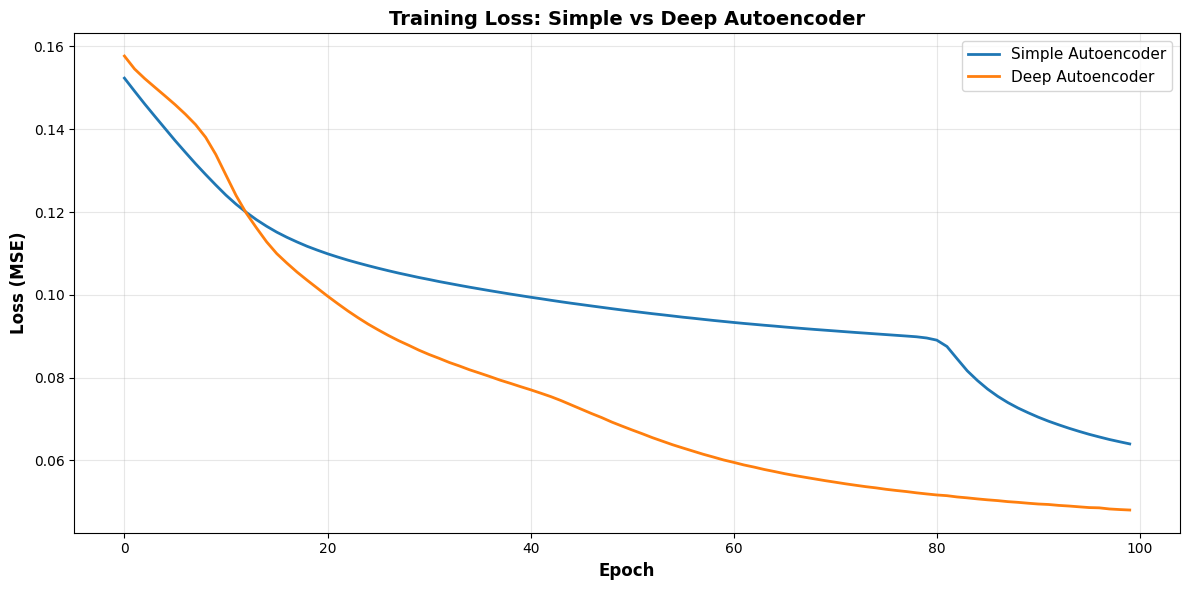

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(history_simple.history['loss'], label='Simple Autoencoder', linewidth=2)
plt.plot(history_deep.history['loss'], label='Deep Autoencoder', linewidth=2)
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('Training Loss: Simple vs Deep Autoencoder', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: Calculate Reconstruction Error (MSE)

### Simple Autoencoder MSE

In [34]:
decoded_simple_data = ae_simple.predict(X_norm, verbose=0)
mse_simple = np.mean((X_norm - decoded_simple_data) ** 2)
print(f"Simple Autoencoder MSE: {mse_simple:.6f}")

Simple Autoencoder MSE: 0.063693


### Deep Autoencoder MSE

In [35]:
decoded_deep_data = ae_deep.predict(X_norm, verbose=0)
mse_deep = np.mean((X_norm - decoded_deep_data) ** 2)
print(f"Deep Autoencoder MSE: {mse_deep:.6f}")

Deep Autoencoder MSE: 0.047859


## Step 8: Comparison Summary

In [36]:
print("\n" + "="*60)
print("AUTOENCODER COMPARISON")
print("="*60)
print(f"{'Architecture':<20} | {'MSE':<15} | {'Final Loss':<15}")
print("-"*60)
print(f"{'Simple (3 neurons)':<20} | {mse_simple:<15.6f} | {history_simple.history['loss'][-1]:<15.6f}")
print(f"{'Deep (8->3->8)':<20} | {mse_deep:<15.6f} | {history_deep.history['loss'][-1]:<15.6f}")
print("="*60)


AUTOENCODER COMPARISON
Architecture         | MSE             | Final Loss     
------------------------------------------------------------
Simple (3 neurons)   | 0.063693        | 0.063999       
Deep (8->3->8)       | 0.047859        | 0.048032       


## Summary

**Key Observations:**
- Deep autoencoder typically achieves better reconstruction
- Additional hidden layers capture complex patterns
- Both compress 13 features to 3-dimensional representation